In [79]:
import numpy as np
import os
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [80]:
PROJECT_ROOT_DIR = "."
IMAGE_DIR = "images"

X=None
y=None

In [81]:
def sort_by_target(mnist):
    reorder_index = np.array(sorted([(target, i) for i, target in enumerate(mnist.target)]))[:, 1]
    mnist.data = mnist.data.iloc[reorder_index]
    mnist.target= mnist.target[reorder_index]

In [82]:
def load_and_sort():
    global X
    global y
    mnist = fetch_openml('mnist_784', version=1,cache=True)
    mnist.target = mnist.target.astype(np.int8)
    sort_by_target(mnist)
    X,y = mnist["data"],mnist["target"]
    mnist["data"], mnist["target"]

In [83]:
def random_digit(i):
    some_digit = X.iloc[[i]] #taken ith entry of dataframe
    some_digit_image = some_digit.values.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = mpl.cm.binary,
            interpolation="nearest")
    plt.axis("off")

    #save_fig("some_digit_plot")
    plt.show()
    return some_digit

In [84]:
def train_predict(some_digit,index):
    global sgd_clf
    shuffle_index = np.random.permutation(60000)
    X_train, y_train = X.iloc[:60000], y[:60000]

    X_test, y_test = X.iloc[60000:], y[60000:]

    X_train, y_train = X_train.iloc[shuffle_index],y_train.iloc[shuffle_index]
    # Binary number 5 Classifier
    y_train_5 = (y_train == 5)
    y_test_5 = (y_test == 5)

    
    # print prediction result of the given input some_digit
    sgd_clf = SGDClassifier(max_iter=20,tol=-np.infty)
    sgd_clf.fit(X_train, y_train_5)

    prediction = sgd_clf.predict(some_digit)
    print(f'\n\nActual digit value = {y.iloc[index]} \n Is this digit 5?  {prediction}')
    score = cross_val_score(sgd_clf,X_train,y_train_5)
    print(f'cross validation score is: {score}')


In [86]:

load_and_sort()

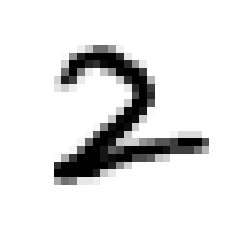

In [87]:
somedigit = random_digit(15000)

In [88]:
train_predict(somedigit,15000)



Actual digit value = 2 
 Is this digit 5?  [False]
cross validation score is: [0.95891667 0.96025    0.93275    0.95916667 0.96833333]


In [ ]:
somedigit = random_digit(36000)
prediction = sgd_clf.predict(somedigit)
print(f'\n\nActual digit value = {y.iloc[36000]} \n Is this digit 5?  {prediction}')

In [ ]:
somedigit = random_digit(13000)
prediction = sgd_clf.predict(somedigit)
print(f'\n\nActual digit value = {y.iloc[13000]} \n Is this digit 5?  {prediction}')


In [ ]:
somedigit = random_digit(400)
prediction = sgd_clf.predict(somedigit)
print(f'\n\nActual digit value = {y.iloc[400]} \n Is this digit 5?  {prediction}')